ABOUT DATASET:
There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

In [94]:
#importing the models
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('banking-dataset.csv')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [5]:
data.shape

(32950, 16)

In [6]:
#data cleaning
data.columns = data.columns.str.lower()
string_columns = list(data.dtypes[data.dtypes == 'object'].index)

for col in string_columns:
    data[col] = data[col].str.lower().str.replace('-', '.')


In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue.collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [8]:
data['education'].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [9]:
data['education']=np.where(data['education'] =='basic.9y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'basic', data['education'])

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue.collar,married,basic,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [11]:
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [12]:
data.describe(include="object").T

,count,unique,top,freq
job,32950,12,admin.,8314
marital,32950,4,married,19953
education,32950,6,basic,10013
default,32950,3,no,26007
housing,32950,3,yes,17254
loan,32950,3,no,27131
contact,32950,2,cellular,20908
month,32950,10,may,11011
day_of_week,32950,5,thu,6857
poutcome,32950,3,nonexistent,28416


In [13]:
#checking for missing values
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [14]:
data["y"].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

Text(0.5, 1.0, 'target variable')

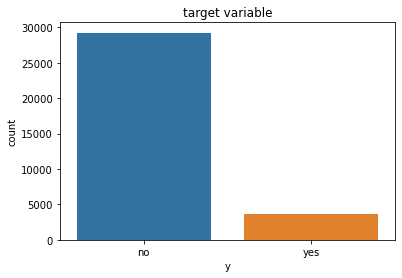

In [15]:
sns.countplot(data["y"])
plt.title("target variable")

In [16]:
#there is imbalance in our target variable

In [17]:
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)

percentage of NO and YES
 no     88.734446
yes    11.265554
Name: y, dtype: float64


# EDA


In [18]:
for col in data.columns[:5]:
    print(data[col].value_counts())

31    1551
32    1474
33    1443
35    1417
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64
admin.           8314
blue.collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self.employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64
basic                  10013
university.degree       9736
high.school             7596
professional.course     4192
unknown                 1397
illiterate                16
Name: education, dtype: int64
no         26007
unknown     6940
yes            3
Name: default, dtype: int64


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


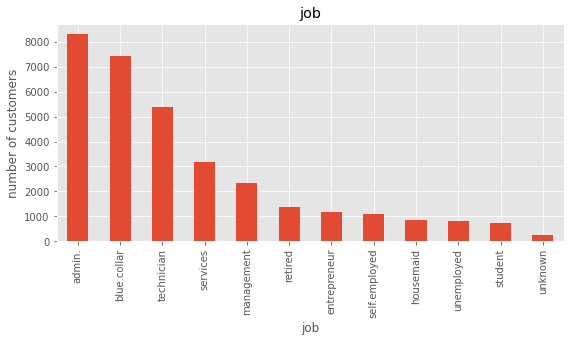

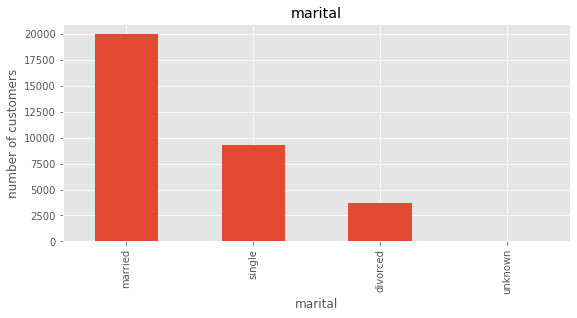

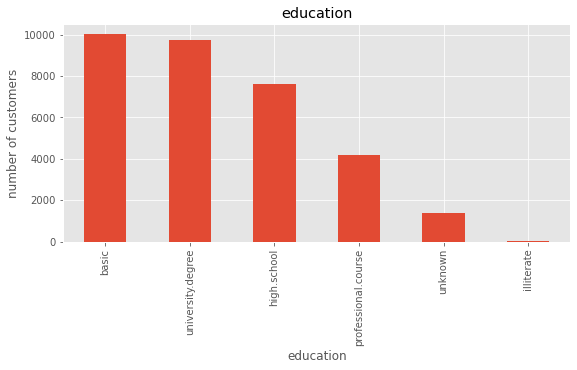

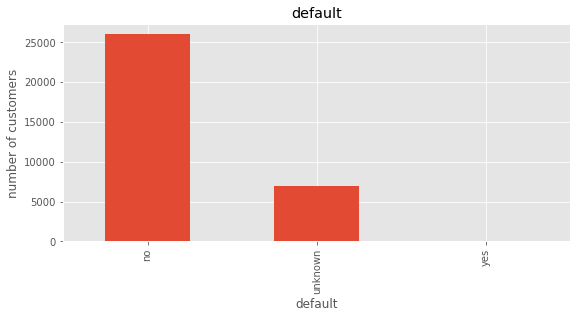

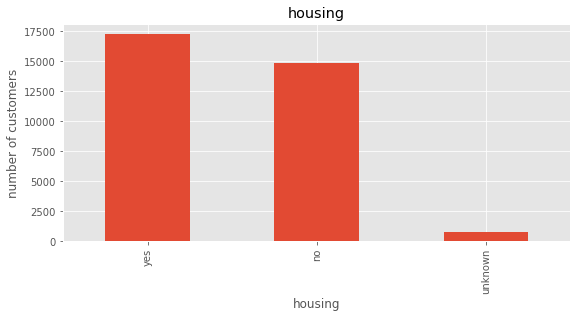

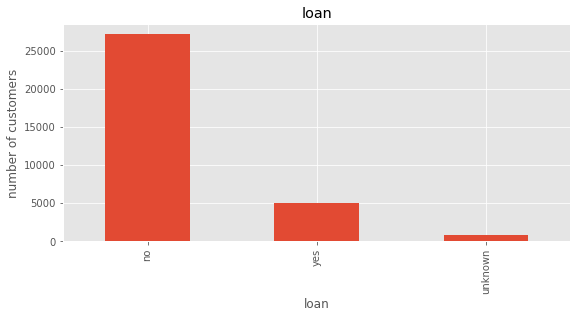

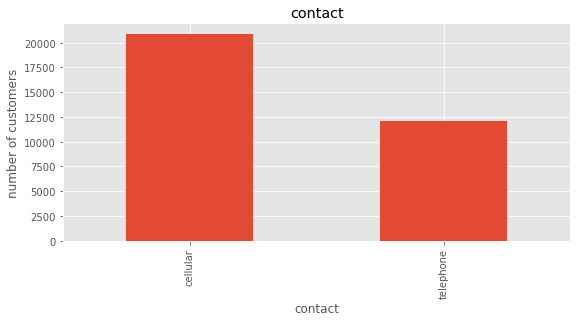

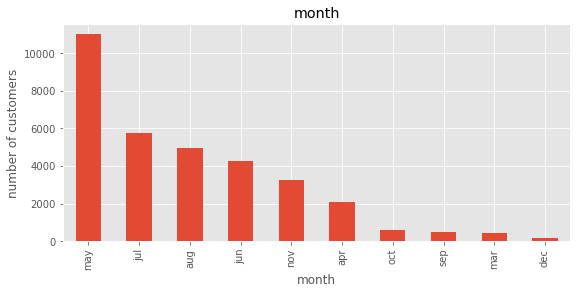

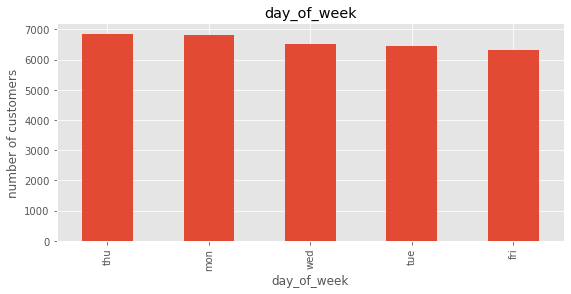

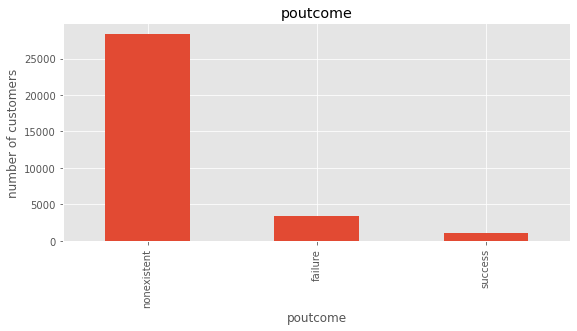

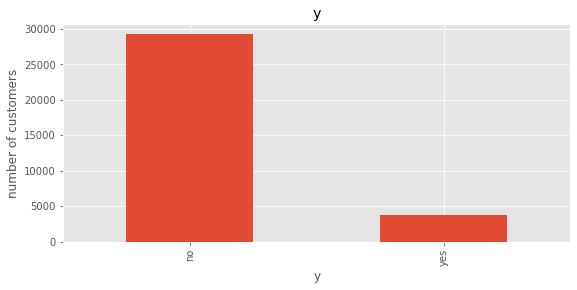

In [19]:
# sorting out the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

OBSERVATION:
-The top three professions that our customers belong to are - admin, blue-collar jobs and technicians.
-A huge number of the customers are married.
-Many of our past customers have applied for a housing loan but very few have applied for personal loans.
-Cell-phones seem to be the most favoured method of reaching out to customers.
-Many customers have been contacted in the month of May.
-The plot for the target variable shows heavy imbalance in the target variable.

In [20]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

In [21]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


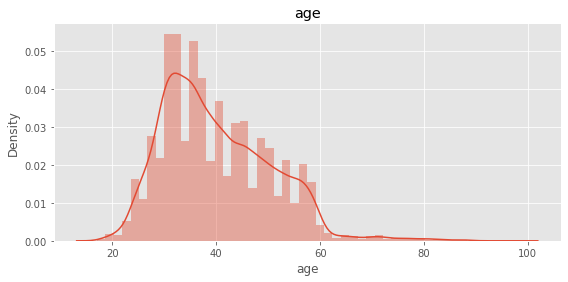

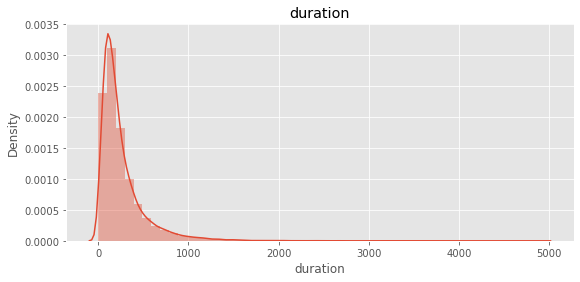

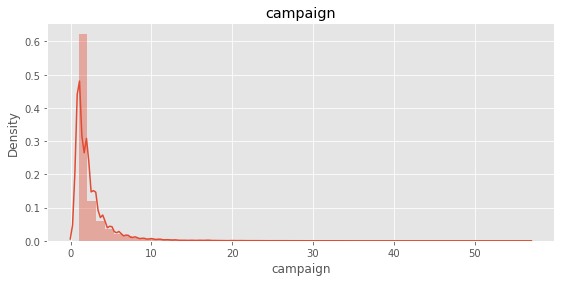

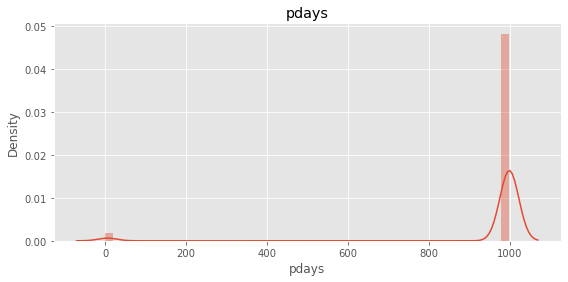

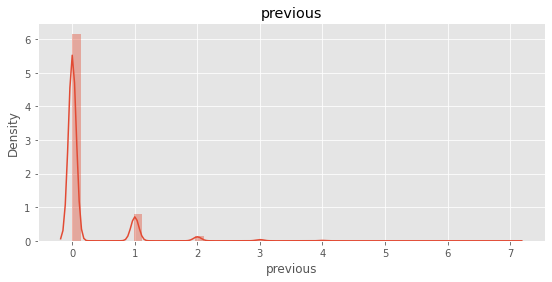

In [22]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign", "pdays", "previous"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

<AxesSubplot:>

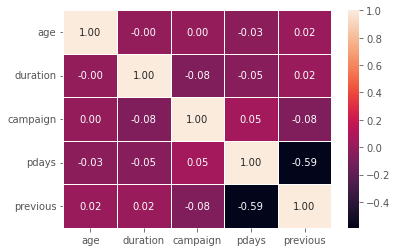

In [23]:
sns.heatmap(data.corr(),annot=True,fmt=".2f",linewidths=.8)

In [24]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue.collar,married,basic,no,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [25]:
df = data.copy()

In [26]:
df.drop(columns=["pdays", "previous"], axis=1, inplace=True)

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue.collar,married,basic,no,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,78,retired,married,basic,no,no,no,cellular,jul,mon,1148,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


In [28]:
#data preparation: Create the target variable by mapping yes to 1 and no to 0.
bank = {
    "yes":1,
    "no":0
}
df["y"] = df.y.map(bank)

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue.collar,married,basic,no,no,no,cellular,nov,wed,227,4,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,0
2,78,retired,married,basic,no,no,no,cellular,jul,mon,1148,1,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,0


In [30]:
#splitting the datasets
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.y
y_val = df_val.y
y_test = df_test.y


In [31]:
len(df_train), len(df_val), len(df_test)

(19770, 6590, 6590)

In [32]:
#Calculate the mutual information 
def calculate_mi(series):
    return mutual_info_score(series, df_train.y)

df_mi = df_train[cat_var].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name= 'MI')

display(df_mi)

,MI
y,0.353574
poutcome,0.028761
month,0.025801
contact,0.010831
job,0.009594
marital,0.001755
education,0.001651
day_of_week,0.000130
housing,0.000112
default,0.000018


In [33]:
#deleting target variable
del df_train['y']
del df_val['y']
del df_test['y']

In [34]:
#Training the model
dict_train = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)


In [35]:
#logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [36]:
y_pred_lr = model.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred_lr)

0.9080147945267947

In [37]:
y_pred_lr = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_lr)

0.9131699647222848

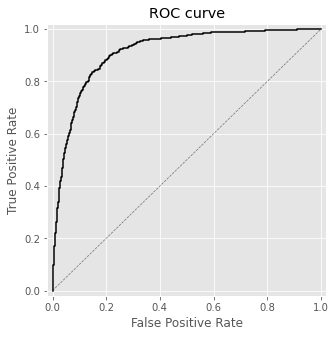

In [39]:
fpr, tpr, _ = roc_curve(y_val, y_pred_lr)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [40]:
#decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred_dt)

1.0

In [42]:
y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.7193924921401588

Our validation model performed poor due to overfitting. Tuning parameters

In [43]:
for m in [5, 6, 10]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 5
1 -> 0.815
5 -> 0.814
10 -> 0.820
15 -> 0.819
20 -> 0.817
50 -> 0.819
100 -> 0.818
200 -> 0.863

depth: 6
1 -> 0.868
5 -> 0.866
10 -> 0.872
15 -> 0.871
20 -> 0.871
50 -> 0.872
100 -> 0.870
200 -> 0.874

depth: 10
1 -> 0.863
5 -> 0.881
10 -> 0.893
15 -> 0.892
20 -> 0.899
50 -> 0.907
100 -> 0.899
200 -> 0.904



In [44]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=200)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=200)

In [45]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9042666305300038

In [46]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import xgboost as xgb

In [48]:
dtrain = xgb.DMatrix(X_train, label=y_train )
dval = xgb.DMatrix(X_val, label=y_val)

In [49]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [50]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9247006964499238

In [51]:
watchlist=[(dtrain, 'train'), (dval, 'val')]

In [52]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

In [53]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [54]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

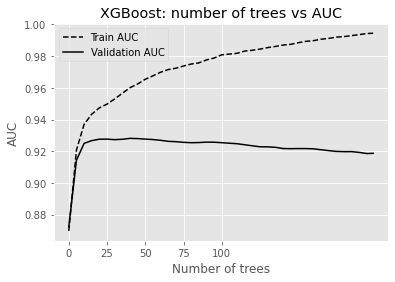

In [55]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

parameter tuning eta

In [56]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

In [57]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.9281
(0.9281, 40)


In [58]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [59]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.92957
(0.92957, 85)


In [60]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [61]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.92933
(0.92933, 180)


In [62]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [63]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.92028
(0.92028, 199)


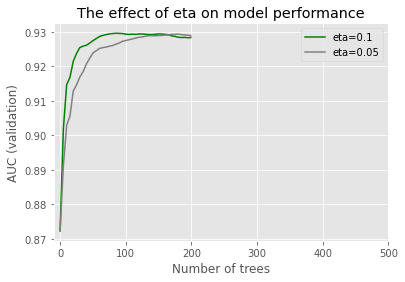

In [64]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='green', linestyle='solid', label='eta=0.1')
#plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')
plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
#plt.plot(tree, aucs_val_eta_03, color='grey', linestyle='dashed', label='eta=0.3')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

plt.show()

tuning max-depth 

In [65]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [66]:
tree, _, aucs_val_depth6 = parse_xgb_output(output)
print(max(aucs_val_depth6))
print(max(zip(aucs_val_depth6, tree)))

0.92957
(0.92957, 85)


In [67]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [68]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val_depth10))
print(max(zip(aucs_val_depth10, tree)))

0.92575
(0.92575, 40)


In [69]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [70]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.92828
(0.92828, 190)


In [71]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [72]:
tree, _, aucs_val_depth15 = parse_xgb_output(output)
print(max(aucs_val_depth15))
print(max(zip(aucs_val_depth15, tree)))

0.92376
(0.92376, 20)


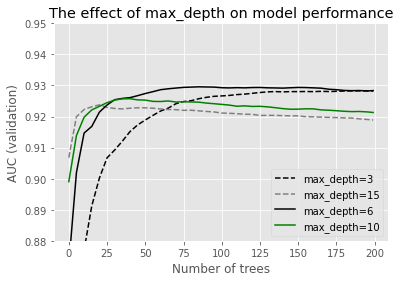

In [73]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth15, color='grey', linestyle='dashed', label='max_depth=15')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='green', linestyle='solid', label='max_depth=10')

plt.ylim(0.88, 0.95)
plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')


plt.show()

tuning min_child_weight

In [74]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [75]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.92957
(0.92957, 85)


In [76]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [77]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.92865
(0.92865, 195)


In [78]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [79]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.92865
(0.92865, 195)


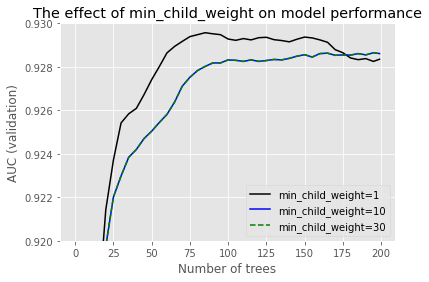

In [80]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='blue', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='green', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.92, 0.93)
plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

checking the number of trees

In [81]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200, verbose_eval=5,
                  evals=watchlist)

In [82]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.92865


In [83]:
max(zip(aucs_val, tree))

(0.92865, 195)

In [84]:
#final model

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=195, verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.86827	val-auc:0.87336
[5]	train-auc:0.89897	val-auc:0.90273
[10]	train-auc:0.90779	val-auc:0.90863
[15]	train-auc:0.91792	val-auc:0.91538
[20]	train-auc:0.92414	val-auc:0.91974
[25]	train-auc:0.92842	val-auc:0.92201
[30]	train-auc:0.93146	val-auc:0.92298
[35]	train-auc:0.93304	val-auc:0.92384
[40]	train-auc:0.93427	val-auc:0.92420
[45]	train-auc:0.93545	val-auc:0.92470
[50]	train-auc:0.93614	val-auc:0.92504
[55]	train-auc:0.93745	val-auc:0.92544
[60]	train-auc:0.93813	val-auc:0.92581
[65]	train-auc:0.93934	val-auc:0.92638
[70]	train-auc:0.94071	val-auc:0.92711
[75]	train-auc:0.94176	val-auc:0.92752
[80]	train-auc:0.94250	val-auc:0.92783
[85]	train-auc:0.94391	val-auc:0.92802
[90]	train-auc:0.94463	val-auc:0.92818
[95]	train-auc:0.94532	val-auc:0.92818
[100]	train-auc:0.94591	val-auc:0.92832
[105]	train-auc:0.94641	val-auc:0.92830
[110]	train-auc:0.94685	val-auc:0.92825
[115]	train-auc:0.94730	val-auc:0.92832
[120]	train-auc:0.94779	val-auc:0.92825
[125]	train-auc:0.9480

In [85]:
y_pred_xgb = model.predict(dval)

In [86]:
roc_auc_score(y_val, y_pred_xgb)

0.9285907707805121

In [87]:
print(roc_auc_score(y_val, y_pred_lr))
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_xgb))

0.9131699647222848
0.7193924921401588
0.9285907707805121


Training the final model

In [88]:
dict_test = df_test.to_dict(orient='records')

X_test = dv.transform(dict_test)

In [89]:
dtest = xgb.DMatrix(X_test, label=y_test)


In [90]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=195, verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.86827	val-auc:0.87336
[5]	train-auc:0.89897	val-auc:0.90273
[10]	train-auc:0.90779	val-auc:0.90863
[15]	train-auc:0.91792	val-auc:0.91538
[20]	train-auc:0.92414	val-auc:0.91974
[25]	train-auc:0.92842	val-auc:0.92201
[30]	train-auc:0.93146	val-auc:0.92298
[35]	train-auc:0.93304	val-auc:0.92384
[40]	train-auc:0.93427	val-auc:0.92420
[45]	train-auc:0.93545	val-auc:0.92470
[50]	train-auc:0.93614	val-auc:0.92504
[55]	train-auc:0.93745	val-auc:0.92544
[60]	train-auc:0.93813	val-auc:0.92581
[65]	train-auc:0.93934	val-auc:0.92638
[70]	train-auc:0.94071	val-auc:0.92711
[75]	train-auc:0.94176	val-auc:0.92752
[80]	train-auc:0.94250	val-auc:0.92783
[85]	train-auc:0.94391	val-auc:0.92802
[90]	train-auc:0.94463	val-auc:0.92818
[95]	train-auc:0.94532	val-auc:0.92818
[100]	train-auc:0.94591	val-auc:0.92832
[105]	train-auc:0.94641	val-auc:0.92830
[110]	train-auc:0.94685	val-auc:0.92825
[115]	train-auc:0.94730	val-auc:0.92832
[120]	train-auc:0.94779	val-auc:0.92825
[125]	train-auc:0.9480

In [91]:
y_pred_xgb = model.predict(dtest)

In [92]:
print("XGBoost: ->",roc_auc_score(y_test, y_pred_xgb))

XGBoost: -> 0.9273021283036491


# Saving our model

In [93]:
import pickle